## CLUSTERING PADA PELANGGAN SUPERMARKET

### A. Business Problem

Supermarket saat ini telah banyak bermunculan. Tidak hanya supermarket besar seperti Carefour dan Transmart. Pada lingkungan perumahan, supermarket skala kecil seperti alfamart dan indomaret juga banyak ditemukan. Sebab semakin menjamurnya bisnis supermarket, industri ini kini jauh lebih kompetitif untuk merebut pangsa pasar.

Agar tetap unggul, manajemen supermarket perlu memanfaatkan kekuatan analisis data untuk lebih memahami performa bisnis, sehingga pelayanan optimal kepada pelanggan dapat diberikan. Salah satu aspek yang dapat dianalisis adalah karakteristik pelanggan. Pelanggan tentuntunya dapat sangat beragam. Namun dengan teknik analisis yang tepat seperti Clustering, manajemen supermarket dapat memahami mereka dengan lebih baik.

Pada kasus ini, manajemen supermarket meminta tim data analis untuk membuat produk analisis yang bertujuan agar manajemen memahami segmentasi pelanggan berdasarkan skor belanja dan usia pelanggan. Segmentasi yang berhasil diidentifikasi dapat mendorong manajemen untuk mengembangkan strategi promosi yang dipersonalisasi dan penawaran produk yang disesuaikan dengan karakteristik setiap segmen. Akhirnya, pendekatan ini akan mengarah pada peningkatan kepuasan pelanggan, loyalitas, dan berefek langsung pada peningkatan omzet supermarket.

### B. Data Understanding

In [90]:
# Library yang dibutuhkan

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import missingno as msno
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('pelanggan_supermarket.csv')

In [92]:
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        245 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        246 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


In [94]:
# Memeriksa duplikasi data
duplicated_data = df.duplicated(subset='ID_pelanggan')
print(df[duplicated_data])

Empty DataFrame
Columns: [ID_pelanggan, Jenis Kelamin, Umur, Pendapatan pertahun (juta), Skor Belanja (1-100)]
Index: []


In [95]:
df.drop('ID_pelanggan', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Umur,245.0,38.730612,14.328726,18.0,29.00,36.0,48.00,120.0
Pendapatan pertahun (juta),250.0,64.736000,25.112324,15.0,47.00,70.0,78.75,137.0
Skor Belanja (1-100),246.0,50.325203,28.668121,3.0,26.25,50.0,74.75,150.0


In [96]:
df.drop('ID_pelanggan', axis=1).describe(include='object').T

,count,unique,top,freq
Jenis Kelamin,250,2,Perempuan,137




---
**Overviews:**

---
1. Terdapat 250 pelanggan pada data tersebut, dan setiap pelanggan bersifat unik (tidak ada duplikasi data).
2. Pada data tersebut juga teridentifikasi *missing values*, tepatnya pada kolom umur dan skor belanja.
3. Outlier juga langsung teridentifikasi melalui method describe(). Pada kolom umur, terdapat usia maksimal 120 tahun. Perlu dipertanyakan, *apakah seorang berusia 120 tahun masih mampu berbelanja ke supermarket?*. Selanjutnya, keanehan data juga pada kolom Skor Belanja (1-100). Sebab dari range skor 1-100, terdapat nilai 150.

---
*Missing Values* dan *outliers* tentunya akan di-*handling* pada bagian selanjutnya agar tidak menimbulkan bias saat dilakukan analisa data.


---


### C. Data Cleaning

#### C.1. Missing Values

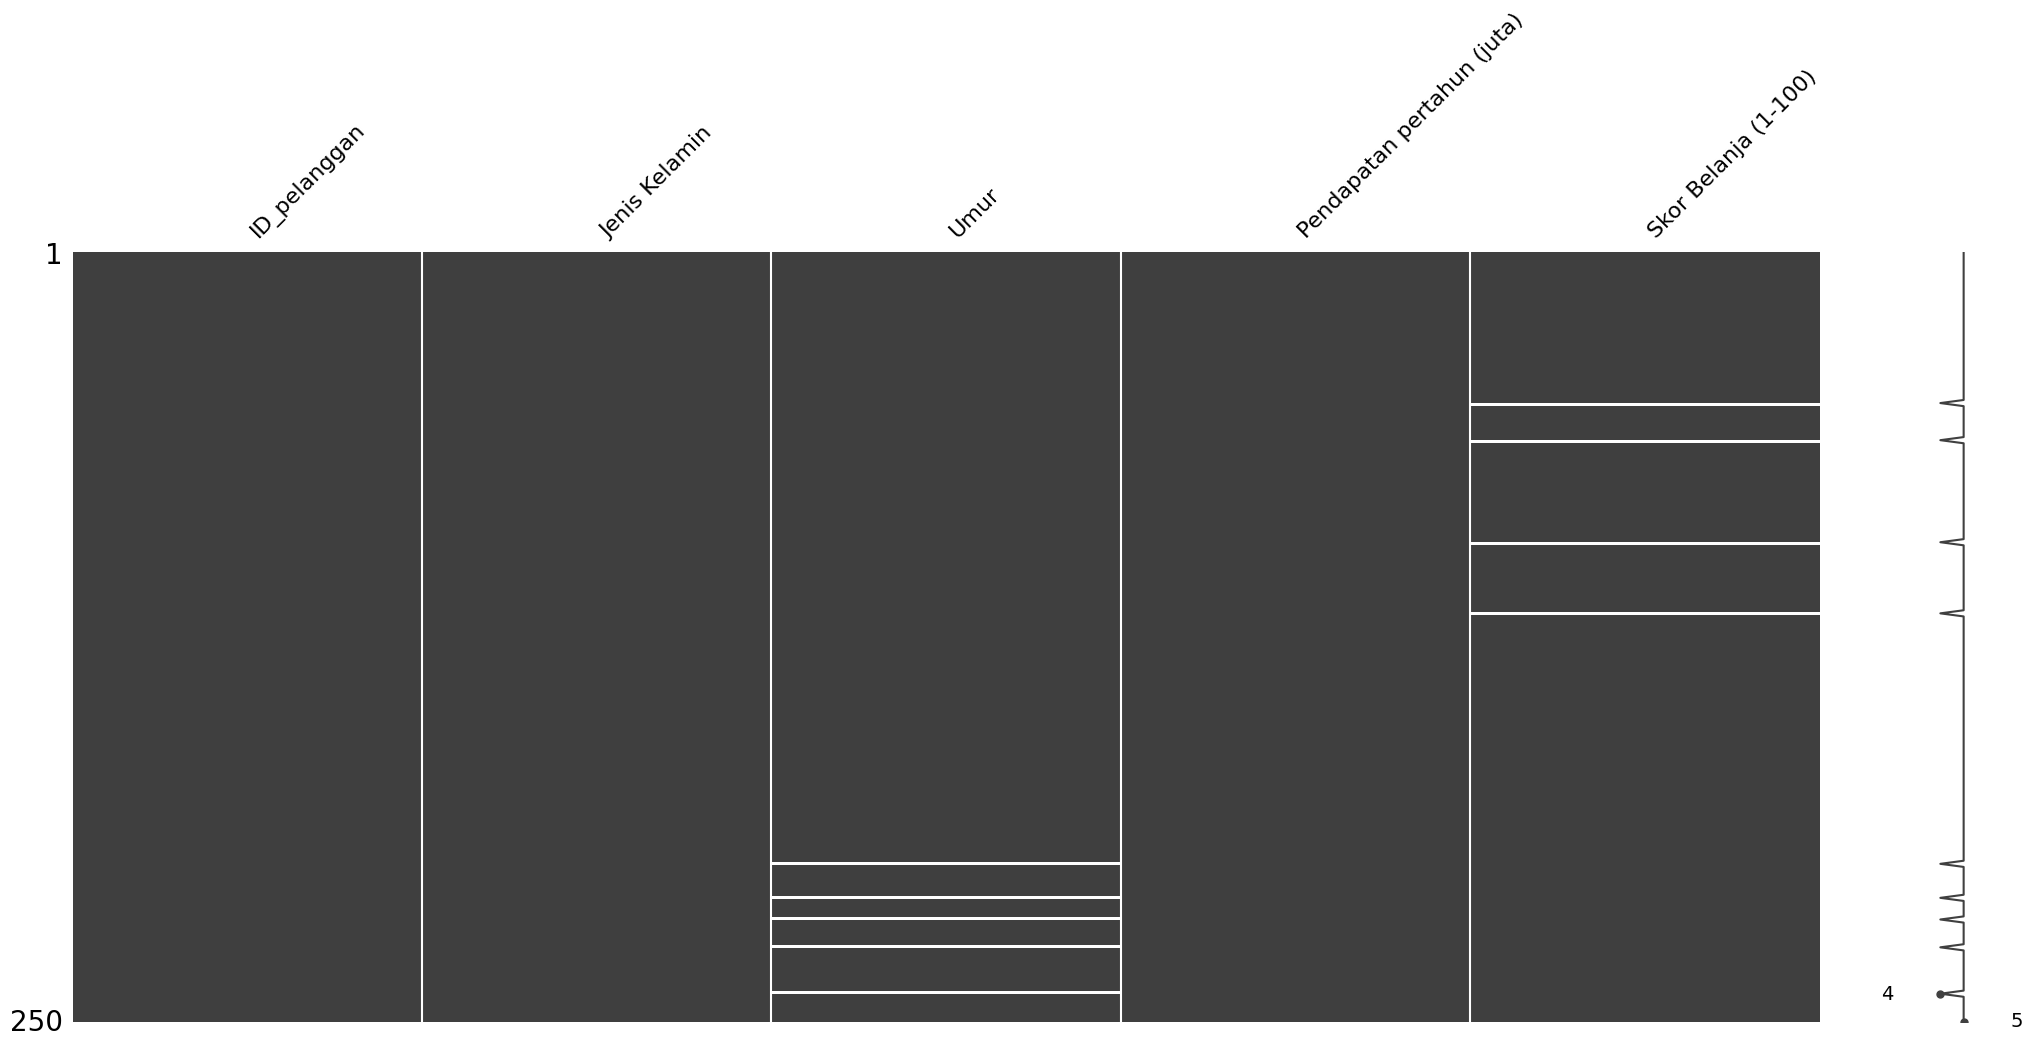

In [97]:
msno.matrix(df);

Grafik di atas memperlihatkan letak missing value dalam baris data. Pada baris data tersebut, nilai yang missing terjadi secara acak. Jika nilai missing dihapus, seluruh data dalam baris tersebut juga terhapus dan kita berpotensi kehilangan informasi yang mungkin penting. Oleh karena jumlah nilai missing tergolong kecil, sekitar 3.6%, maka missing value akan diganti dengan nilai median. Median digunakan karena terdapat outlier dalam data.

In [98]:
# Inisialisasi SimpleImputer
imputer = SimpleImputer(strategy='median')

df_cleaning = df.copy()

# Fit imputer ke data
imputer.fit(df_cleaning[['Umur', 'Skor Belanja (1-100)']])

# Transformasikan data dengan mengisi nilai yang hilang
df_cleaning[['Umur', 'Skor Belanja (1-100)']] = imputer.transform(df_cleaning[['Umur', 'Skor Belanja (1-100)']])

In [99]:
df_cleaning.isna().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [100]:
df_cleaning.shape

(250, 5)

#### C.2. Outliers

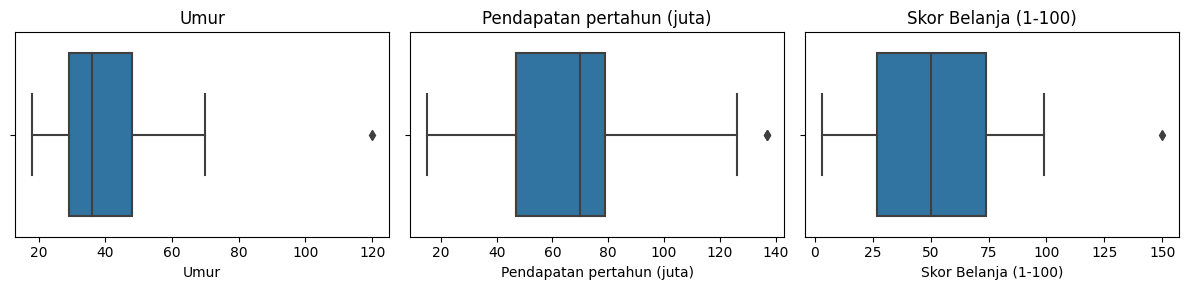

In [101]:
# Periksa nilai pencilan dengan menggunakan boxplot

plt.figure(figsize=(12, 3))

variables = ['Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

for i, var in enumerate(variables, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_cleaning[var])
    plt.title(var)

plt.tight_layout()
plt.show()

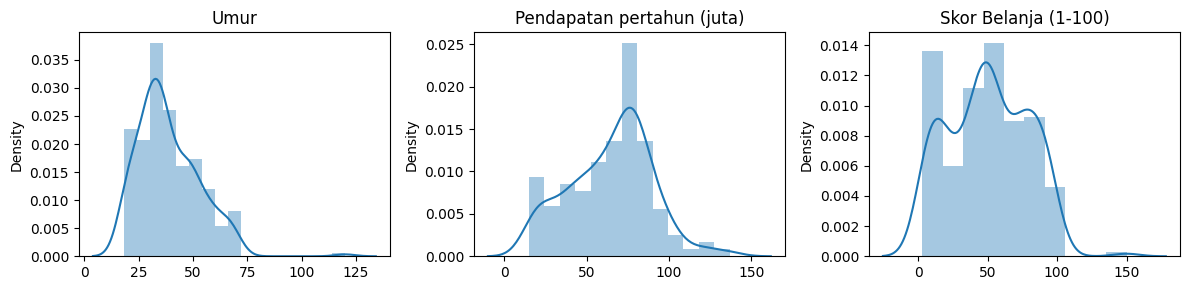

In [102]:
# Periksa nilai pencilan dengan menggunakan distplot

plt.figure(figsize=(12, 3))

variables = ['Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

for i, var in enumerate(variables, start=1):
    plt.subplot(1, 3, i)
    sns.distplot(x=df_cleaning[var])
    plt.title(var)

plt.tight_layout()
plt.show()

Berdasarkan visual boxplor, ketiga variabel tampak terdapat outlier. Namun, outlier pada "Pendapatan pertahun (juta)" dapat dianggap wajar. Alasan pertama karena  jarak outlier tidak terlalu jauh, dan alasan kedua adalah mungkin memang ditemukan pelanggan dengan penghasilan tertinggi tersebut yang berbelanja ke supermarket yang sedang dianalisis ini.

Sayangnya, outlier pada kolom 'Umur' dan 'Skor Belanja (1-100)' dianggap tidak wajar. Sebab, pelanggan dengan usia  125 tahun mungkin mustahil masih mampu berbelanja ke supermarket, sedangkan range maksimal pada skor belanja adalah 100, bukan 150. Berdasarkan analisis ini, kedua outlier akan dihapus.

In [103]:
columns = ['Umur', 'Skor Belanja (1-100)']

for col in columns:
    Q1 = df_cleaning[col].quantile(0.25)
    Q3 = df_cleaning[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_removed = df_cleaning[(df_cleaning[col] >= lower_bound) & (df_cleaning[col] <= upper_bound)]
    df_cleaning[col] = outlier_removed[col]

df_cleaning = df_cleaning.dropna()

In [104]:
df_cleaning.shape

(248, 5)

#### C.3. Remove ID Pelanggan

In [105]:
df_cleaning.drop('ID_pelanggan', axis=1, inplace=True)

In [106]:
df_cleaning.head()

,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,Laki-laki,19.0,15,39.0
1,Laki-laki,21.0,15,81.0
2,Perempuan,20.0,16,6.0
3,Perempuan,23.0,16,77.0
4,Perempuan,31.0,17,40.0


### D. Exploratory Data Analysis

#### D.1. Proporsi Jenis Kelamin

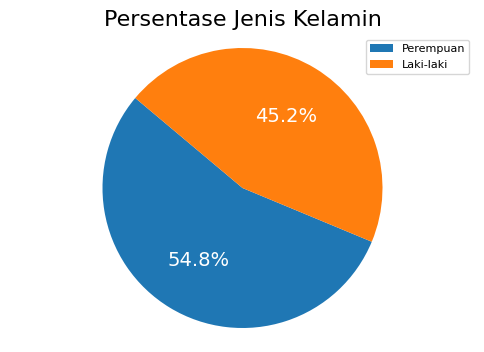

In [107]:
percentage_churn = df_cleaning['Jenis Kelamin'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
plt.pie(percentage_churn, labels=percentage_churn.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'white'})
plt.title('Persentase Jenis Kelamin', fontsize=16)
plt.legend(labels=['Perempuan', 'Laki-laki'], loc='upper right', fontsize=8)
plt.axis('equal')
plt.show()

Pelanggan supermarket ini didominasi oleh perempuan. Meskipun, jumlah pelanggan perempuan tidak terlalu signifikan ketika dibandingkan dengan jumlah pelanggan laki-laki. Namun jika merujuk pada kultur pada umumnya, perempuan memang memiliki kecenderungan untuk berbelanja.

#### D.2. Persebaran Data

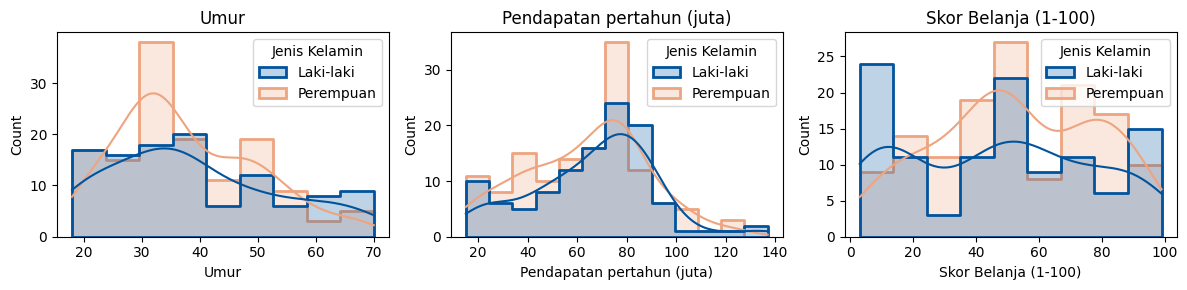

In [108]:
plt.figure(figsize=(12, 3))

variables = ['Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

for i, var in enumerate(variables, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_cleaning, x=var, hue='Jenis Kelamin', kde=True, palette=['#00539CFF', '#EEA47FFF'], element='step', linewidth=2)
    plt.title(var)

plt.tight_layout()
plt.show()

In [109]:
# Defining significance level
significance_level = 0.05

# Performing Shapiro-Wilk test for normality on each numerical column
normality_test_results = {}

for column in df_cleaning.select_dtypes(include=['float64', 'int64']):
    stat, p = shapiro(df_cleaning[column].dropna()) 
    is_significant = p < significance_level
    normality_test_results[column] = {'Statistic': stat, 'p-value': p, 'Significant': is_significant}

# Creating a DataFrame to display the test results
normality_test_df = pd.DataFrame(normality_test_results).T

# Displaying the DataFrame
print(normality_test_df)

                           Statistic  p-value Significant
Umur                        0.953184      0.0        True
Pendapatan pertahun (juta)  0.974077  0.00017        True
Skor Belanja (1-100)        0.952798      0.0        True


Berdasarkan uji statistik yang telah dilakukan, data tidak terdistribusi secara normal. Pada variabel umur, data didominasi oleh perempuan berusia 30-37 tahun. Sedangkan pada variabel Pendapatan pertahun (juta), rata-rata pendapatan baik pelanggan perempuan maupun laki-laki berada pada kisaran 70-90 juta pertahun. Berbeda dengan dua variabel lainnya, data terlihat lebih tersebar pada Skor Belanja (1-100), meskipun terdapat kecenderungan pelanggan laki-laki memberikan skor lebih rendah dibandingkan pelanggan perempuan.

#### D.3. Korelasi Data

In [110]:
df_cleaning['Jenis Kelamin Dummy'] = df_cleaning['Jenis Kelamin'].copy()
df_cleaning['Jenis Kelamin Dummy'] = df_cleaning['Jenis Kelamin Dummy'].replace({'Perempuan': 1, 'Laki-laki' : 2})

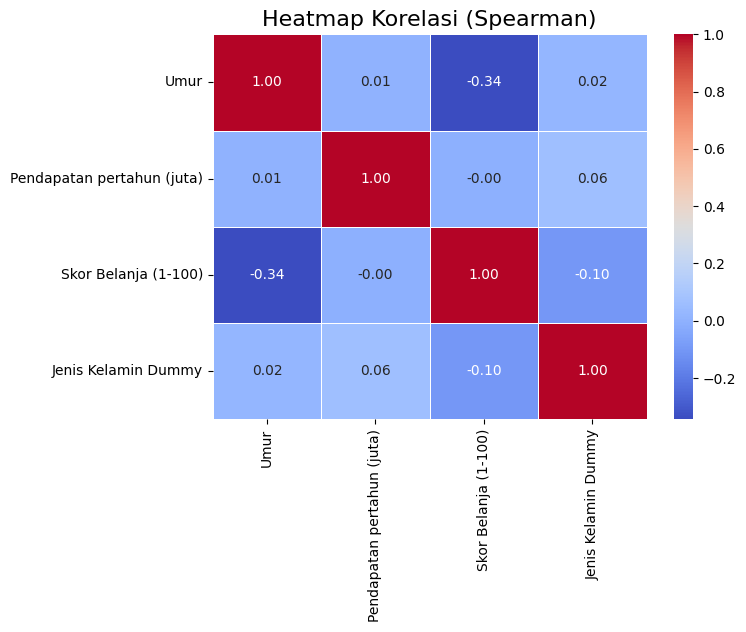

In [111]:
data_corr = df_cleaning.drop(columns=['Jenis Kelamin'])

plt.figure(figsize=(7, 5))
sns.heatmap(data_corr.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi (Spearman)', fontsize=16)
plt.show()

Metode yang digunakan pada uji korelasi tersebut adalah Spearman. Hal ini didasarkan pada uji normalitas bahwa data tidak terdistribusi secara normal. Jenis Kelamin telah dikonversi ke dalam binari 0 dan 1. 0 untuk laki-laki, dan 1 untuk perempuan. Ketika misalnya korelasi antara Umur dan Jenis kelamin bernilai positif, artinya kecenderungan perempuan berusia lebih tua.

Pada grafik heatmap di atas, tampak bahwa hanya variabel Skor Belanja (1-100) yang berkorelasi cukup besar dengan variabel Umur. Sedangkan korelasi variabel lainnya bernilai sangat kecil, yakni satu dan di bawah satu. Dengan demikian berdasarkan pengantar yang telah disebutkan sebelumnya, analisis clustering ini mencoba berforkus hanya pada Umur dan Skor Belanja (1-100) saja.

### E. Data Modelling (Clustering)

Setelah dipahami (*understanding*) dan dibersihkan (*cleaning*), data diproses lebih lanjut menggunakan model Clustering. Pada proses ini, tahap paling awal adalah mengonversi data dengan scaler. Tujuannya adalah agar data memiliki skala yang sama dan akhirnya dihasilkan analisis yang lebih akurat. Langkah berikutnya adalah menentukan berapa kluster yang akan dibuat. Metode Elbow mungkin dapat membantu, namun keputusan jumlah kluster yang akan dibuat kembali pada  data analyst dengan berdiskusi terlebih dahulu dengan tim manajemen supermarket. Setelah scaler dan penentuan kluster, clustering dapat dilakukan. Hasilnya akan ditampilkan ke dalam grafik scatter plot dengan menyertakan cluster yang sudah dibuat.

In [112]:
# Data Scalling
scaler = StandardScaler()

x_array = np.array(df_cleaning[['Umur', 'Skor Belanja (1-100)']])
data_scaled = scaler.fit_transform(x_array)
data_scaled

array([[-1.46232822e+00, -3.99433830e-01],
       [-1.31128391e+00,  1.11733714e+00],
       [-1.38680607e+00, -1.59118245e+00],
       [-1.16023959e+00,  9.72882763e-01],
       [-5.56062335e-01, -3.63320235e-01],
       [-1.23576175e+00,  9.36769168e-01],
       [-2.53973706e-01, -1.59118245e+00],
       [-1.16023959e+00,  1.58681387e+00],
       [ 1.93616885e+00, -1.69952323e+00],
       [-6.31584493e-01,  7.92314790e-01],
       [ 2.16273533e+00, -1.30227369e+00],
       [-2.53973706e-01,  1.76738184e+00],
       [ 1.48303591e+00, -1.26616010e+00],
       [-1.08471744e+00,  9.72882763e-01],
       [-1.02929392e-01, -1.33838729e+00],
       [-1.23576175e+00,  1.04510995e+00],
       [-1.38680607e+00,  5.75633223e-01],
       [ 1.02990297e+00, -7.60569776e-01],
       [-2.53973706e-01,  1.73126825e+00],
       [-2.53973706e-01, -5.43888208e-01],
       [-1.00919528e+00,  8.28428385e-01],
       [ 5.76770024e-01, -1.62729604e+00],
       [-5.56062335e-01,  8.28428385e-01],
       [ 1.

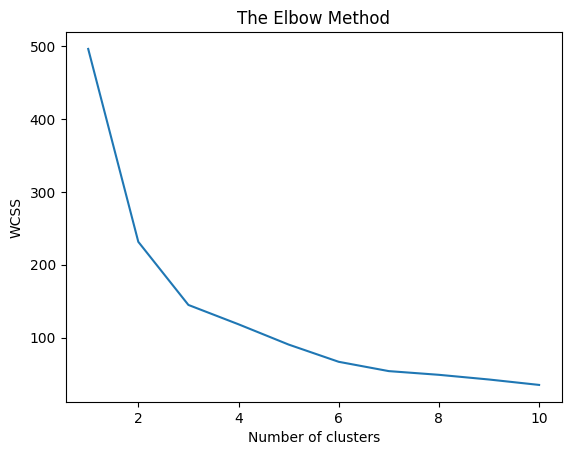

In [113]:
# Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat

sum_of_squared_distances = []
K = range(1,11)
for k in K:
  km = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [114]:
# Memeriksa Nilai silhouette_score Setiap Cluster
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(data_scaled)
    sc_label = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
    print(f'jika k bernilai {i}, maka SC-nya: {sc_label}')


jika k bernilai 2, maka SC-nya: 0.4892317207169413
jika k bernilai 3, maka SC-nya: 0.4689534243402404
jika k bernilai 4, maka SC-nya: 0.41121892705464264
jika k bernilai 5, maka SC-nya: 0.4448643504055222


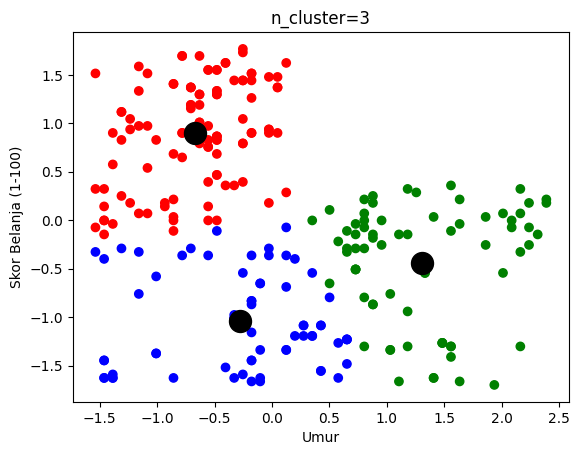

In [124]:
# Penerapan Model Clustering Pada Data dengan Satuan Data yang telah di Scalling
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_scaled)

colors = ['blue', 'red', 'green']
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=[colors[label] for label in kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker='o', s=250, color='black')

plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('n_cluster=3')
plt.show()


In [120]:
# Menambahkan Kolom Cluster yang telah dibuat ke dalam data sebelum scalling
df_cleaning["kluster"] = kmeans.labels_
df_cleaning['kluster'] = df_cleaning['kluster'].replace({0:1, 1:2, 2:3})
df_cleaning.drop(['Jenis Kelamin', 'Pendapatan pertahun (juta)', 'Jenis Kelamin Dummy'], axis=1)

,Umur,Skor Belanja (1-100),kluster
0,19.0,39.0,1
1,21.0,81.0,2
2,20.0,6.0,1
3,23.0,77.0,2
4,31.0,40.0,1
...,...,...,...
244,27.0,69.0,2
245,59.0,14.0,3
246,35.0,90.0,2
247,37.0,32.0,1


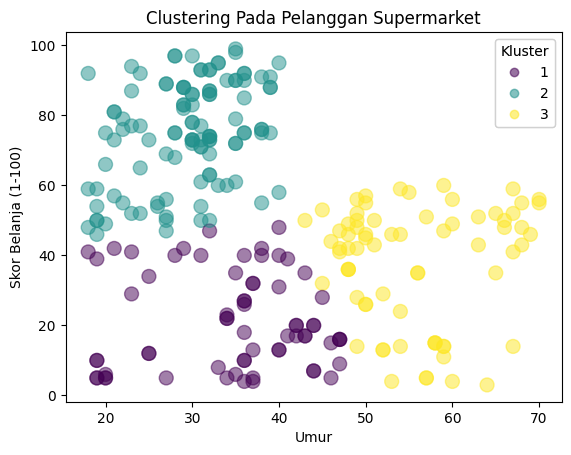

In [121]:
# Menampilkan kembali grafik cluster dengan 2 variabel dan satuan skor yang sebenarnya (bukan hasil scalling)
fig, ax = plt.subplots()
sct = ax.scatter(df_cleaning['Umur'], df_cleaning['Skor Belanja (1-100)'], s=100, c=df_cleaning['kluster'], marker="o", alpha=0.5)

legend = ax.legend(*sct.legend_elements(), title="Kluster")
ax.add_artist(legend)

plt.title("Clustering Pada Pelanggan Supermarket")
plt.xlabel("Umur")
plt.ylabel("Skor Belanja (1-100)")
plt.show()


In [122]:
# Melihat Nilai Mean Umur dan Skor Belanja, serta Persentase Pelanggan berdasarkan Klusternya
cluster_customer = df_cleaning.groupby('kluster')[['Umur', 'Skor Belanja (1-100)', 'Jenis Kelamin']].agg({'Umur':'mean', 'Skor Belanja (1-100)':'mean', 'Jenis Kelamin':'count'}).round(2)
cluster_customer = cluster_customer.rename(columns={'Umur':'Mean Umur', 'Skor Belanja (1-100)':'Mean Skor Belanja (1-100)', 'Jenis Kelamin':'Pelanggan(%)'}).sort_values(by=('Mean Skor Belanja (1-100)'), ascending=False)
cluster_customer['Pelanggan(%)'] = round(cluster_customer['Pelanggan(%)']/df_cleaning.shape[0]*100,2)
cluster_customer

,Mean Umur,Mean Skor Belanja (1-100),Pelanggan(%)
kluster,,,
2,29.50,75.03,44.76
3,55.65,37.75,28.63
1,34.67,21.32,26.61


### F. Analysis and Recommendation

Berdasarkan silhouette score yang telah dilakukan, terlihat bahwa pelanggan dengan 2 kluster memiliki nilai tertinggi. Namun, 2 kluster dianggap terlalu sedikit dan kurang menggambarkan kondisi pelanggan yang akan dikluster. Sehingga, pelanggan dengan 3 kluster digunakan karena memiliki nilai tertinggi kedua setelah 2 kluster.

#### Pengondisian
Pada data tidak dijelaskan definisi dari Skor Belanja. Hal ini dapat menimbulkan kesalahan interpretasi dan rekomendasi yang dihasilkan. Oleh sebab itu, pada bagian Analisis dan Rekomendasi ini akan dibuat pengondisian terkait variabel tersebut.
- **Kondisi 1:** Skor Belanja dianggap sebagai rate seberapa sering seorang pelanggan berbelanja pada supermarket ini
- **Kondisi 2:** Pada data hanya terdapat 250 pelanggan dan tidak diketahui periodenya. Didasarkan pada jumlah tersebut, skala supermarket ini dapat dianggap sebagai supermarket berskala kecil dan menjual kebutuhan harian seperti Indomaret dan Alfamart 

Berdasarkan pengantar tentang kluster dan pengondisian data, berikut adalah analisis dan rekomendasi yang dapat diberikan.


### Kluster 1:
- Rata-rata Usia: 35 tahun
- Rata-rata Skor Belanja: 21
- Persentase: 26%

**Analisis:**
Kluster ini memiliki usia relatif muda dengan skor belanja yang rendah. Secara demografi, mereka dikategorikan sebagai kelompok menikah yang biasanya memiliki kebiasaan berbelanja bulanan. Diketahui bahwa supermarket ini berskala kecil. Tujuan dari pelanggan kluster 1 ini berbelanja ke supermarket mungkin karena ada barang-barang yang habis dari stok bulanan, atau hanya ingin sekadar membeli keperluan tertentu. 

**Rekomendasi:**
1. Identifikasi barang-barang yang seringkali dibeli oleh kelompok usia ini, kemudian buat display menarik dan memudahkan kelompok ini berbelanja.
2. Berikan promo cashback untuk menciptakan efek retensi membeli kembali di kemudian hari.
3. Pastikan harga bersaing untuk menghindari pelanggan kluster ini membandingkan harga dengan tempat mereka berbelanja bulanan.


### Kluster 2:
- Rata-rata Usia: 30 tahun
- Rata-rata Skor Belanja: 75
- Persentase: 45%

**Analisis:**
Kluster ini terdiri dari individu muda dengan skor belanja yang tinggi. Ini mungkin menunjukkan bahwa mereka adalah konsumen yang aktif. Sebagian dari mereka mungkin belum menikah dan tidak memberlakukan belanja buatan. Sehingga, mereka akan senantiasa berbelanja ke supermarket ini ketika kebutuhan harian mereka habis, atau hanya sekadar ingin jajan.

**Rekomendasi:**
1. Program Loyalitas seperti member ID. Membangun program loyalitas yang menarik, seperti cashback atau reward points, dapat mendorong pelanggan dalam kluster ini untuk tetap berbelanja.
2. Melakukan kemitraan dengan Brand Populer. Menggandeng merek atau influencer populer yang diminati oleh pelanggan kluster ini dapat meningkatkan minat mereka terhadap produk atau layanan yang ditawarkan.
3. Lakukan promosi berdasarkan periode atau event tertentu untuk menarik perhatian kelompok ini. Dapat juga dilakukan cross selling serta pembelian secara bundle, sehingga mendorong penjualan yang lebih meningkat kepada kelompok kluster ini.


### Kluster 3:
- Rata-rata Usia: 56 tahun
- Rata-rata Skor Belanja: 38
- Persentase: 29%

**Analisis:**
Kluster ini terdiri dari individu yang lebih tua dengan skor belanja yang cenderung rendah. Kebutuhan belanja mereka seharusnya sudah dipenuhi oleh anak-anak mereka, atau sama seperti pada pelanggan Kluster 1 yang menerapkan belanja bulanan. Mereka seharusnya ke supermarket ini untuk membeli kebutuhan yang sudah habis dari stok bulanan, atau hanya ingin sekadar mengajak cucu jajan.

**Rekomendasi:**
1. Penawaran produk yang sesuai. Menawarkan produk yang sesuai dengan kebutuhan dan preferensi generasi yang lebih tua dapat meningkatkan minat mereka dalam berbelanja.
2. Pelayanan pelanggan yang ramah, serta siap membantu jika pelanggan kluster ini mengalami kesulitan dalam mencari produk atau kesulitan dalam memahami produk. Memberikan pelayanan pelanggan yang ramah dan personal dapat membantu membangun hubungan yang kuat dengan pelanggan dalam kluster ini.
3. Sediakan juga produk jajanan yang ramah anak untuk dipromosikan kepada pelanggan kluster ini ketika mereka datang untuk sekadar membawa cucu jajan.


Diharapkan melalui rekomendasi ini dapat meningkatkan pengalaman belanja dan loyalitas pelanggan dalam setiap kluster, serta membantu meningkatkan kinerja bisnis secara keseluruhan.